In [196]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [311]:
def plot_density(x1,x2,title,fname = ""):
    color1, color2 = 'darkcyan', 'olive'
    ax = sns.kdeplot(x = x1, color = color1)
    kdeline1 = ax.lines[0]
    mean1 = x1.mean()
    xs1 = kdeline1.get_xdata()
    ys1 = kdeline1.get_ydata()
    height1 = np.interp(mean1, xs1, ys1)
    ax.vlines(mean1, 0, height1, color=color1, ls=':')
    ax.fill_between(xs1, 0, ys1, facecolor=color1, alpha=0.2)
    
    try:
        ax = sns.kdeplot(x = x2, color = color2)
        kdeline2 = ax.lines[1]
        mean2 = x2.mean()
        xs2 = kdeline2.get_xdata()
        ys2 = kdeline2.get_ydata()
        height2 = np.interp(mean2, xs2, ys2)
        ax.vlines(mean2, 0, height2, color=color2, ls=':')
        ax.fill_between(xs2, 0, ys2, facecolor=color2, alpha=0.2)
        plt.legend(labels = ['licencjat/inżynier','magister'])
    except IndexError:
        ax.vlines(x2,0,height1,color = color2, ls = ':')
        ax.fill_between(xs1, 0, ys1, facecolor=color2, alpha=0.2)
    plt.yticks()
    plt.xlabel('wysokość zarobków [zł]')
    plt.ylabel('gęstość')
    plt.title(f'Rozkład średnich zarobków miesięcznych 5 lat po otrzymaniu dyplomu \n {title}')
    plt.savefig(f'income_distribution{fname}.png', bbox_inches = 'tight')
    plt.show()

In [199]:
df = pd.read_csv('graduates-major-data.csv',sep = ';')

In [200]:
field = 'P_KIERUNEK_NAZWA'
income = 'P_E_ZAR_ETAT_P5'

labels = [field, 
          'P_E_ZAR_ETAT_P1',
          'P_E_ZAR_ETAT_P2',
          'P_E_ZAR_ETAT_P3',
          'P_E_ZAR_ETAT_P4',
          income,
         'P_NAZWA_UCZELNI',
         'P_NAZWA_JEDN', 
         'P_N', #liczba absolwentów
         'P_POZIOM',# 1- licencjat/inz, 2 - mgr] 
         'P_ROKDYP',
         'P_JEDN',#kod wydzialu
         'P_FORMA'] #Stacjonarne/Niestacjonarne

incomes = ['P_E_ZAR_ETAT_P1',
          'P_E_ZAR_ETAT_P2',
          'P_E_ZAR_ETAT_P3',
          'P_E_ZAR_ETAT_P4',
            income]

df_inf = df[df[field].str.contains('informatyka', flags = re.IGNORECASE, regex = True)]
df_inf = df_inf[labels]
df_inf = df_inf[df_inf['P_N']>=25]
for income in incomes:
    df_inf[income] = df_inf[income].str.replace(',','.').astype(float)

In [201]:
df_inf[income].isna().sum()/len(df_inf[income])

0.6912691269126913

ponad 2/3 w kolumnie dochodu po pięciu latach to wartości puste (NaN)

In [202]:
df_inf.P_ROKDYP.value_counts()

2019    203
2017    194
2018    191
2016    180
2015    175
2014    168
Name: P_ROKDYP, dtype: int64

In [203]:
df_inf_2014 = df_inf[df_inf.P_ROKDYP == 2014]
df_inf_2015 = df_inf[df_inf.P_ROKDYP == 2015]
df_inf_2016 = df_inf[df_inf.P_ROKDYP == 2016]

In [204]:
print(df_inf_2014[income].isna().sum()/len(df_inf_2014[income]))
print(df_inf_2015[income].isna().sum()/len(df_inf_2015[income]))
print(df_inf_2016[income].isna().sum()/len(df_inf_2016[income]))

0.0
0.0
1.0


dane ograniczymy do uzyskania dyplomu w 2014 oraz 2015 by móc określić dochody absolwentów 5 lat później

In [205]:
df_inf = df_inf[(df_inf['P_ROKDYP'] >= 2014) & (df_inf['P_ROKDYP'] <= 2015)]

In [206]:
df_inf[income].isna().sum()/len(df_inf[income])

0.0

dla lat 2014-2015 uzyskania dyplomu dane są kompletne, brak NaN w kolumnie dochodu po pięciu latach

In [207]:
df_inf_N = df_inf[df_inf.P_FORMA == 'N']
df_inf_S = df_inf[df_inf.P_FORMA == 'S']

In [208]:
compare_S = df_inf_S[[field,'P_POZIOM']+incomes].groupby([field, 'P_POZIOM']).mean().sort_index()
compare_N = df_inf_N[[field,'P_POZIOM']+incomes].groupby([field, 'P_POZIOM']).mean().sort_index()

roi = (przychod-koszty)/koszty

In [209]:
compare_S

P_E_ZAR_ETAT_P1  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Bioinformatyka                                     1             2181.920000   
Bioinformatyka - k. unikatowy                      1             1759.780000   
Informatyka                                        1             3287.113481   
                                                   2             4995.213788   
Informatyka analityczna                            1             4442.650000   
Informatyka i agroinżynieria                       1             2809.035000   
Informatyka i ekonometria                          1             2776.778235   
                                                   2             3934.246429   
Informatyka stosowana                              1             3816.840000   
                                                   2             5808.474000   
Informatyka stosowana - k. unikatowy               1             2992.655000   
Informatyka w biznesie - k. unikatowy              1             2801.820000   
                                                   2             4143.590000   
Makrokierunek - automatyka i robot.,elektronika... 1             2830.590000   
                                                   2             4306.060000   
Makrokierunek - elektronika, informatyka i tele... 1             5159.045000   
                                                   2             6347.120000   
Makrokierunek - informatyka przemysłowa            1             2720.580000   
Makrokierunek - informatyka stosowana z kompute... 1             1872.195000   
Teleinformatyka - k. unikatowy                     1             3661.085000   
                                                   2             4264.475000   

                                                             P_E_ZAR_ETAT_P2  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Bioinformatyka                                     1             3345.280000   
Bioinformatyka - k. unikatowy                      1             2063.585000   
Informatyka                                        1             4177.145556   
                                                   2             6177.401818   
Informatyka analityczna                            1             6306.210000   
Informatyka i agroinżynieria                       1             3221.955000   
Informatyka i ekonometria                          1             3606.894706   
                                                   2             4975.330714   
Informatyka stosowana                              1             4795.161429   
                                                   2             6845.960000   
Informatyka stosowana - k. unikatowy               1             3675.100000   
Informatyka w biznesie - k. unikatowy              1             3815.100000   
                                                   2             5178.690000   
Makrokierunek - automatyka i robot.,elektronika... 1             3922.520000   
                                                   2             5576.870000   
Makrokierunek - elektronika, informatyka i tele... 1             5893.660000   
                                                   2             7366.590000   
Makrokierunek - informatyka przemysłowa            1             3947.560000   
Makrokierunek - informatyka stosowana z kompute... 1             2934.395000   
Teleinformatyka - k. unikatowy                     1             4387.777500   
                                                   2             5715.700000   

                                                             P_E_ZAR_ETAT_P3  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Bioinformatyka                                     1             3991.120000   
Bioinformatyka - k. unikatowy                      1             2797.585000   
Informatyka                                        1       

In [210]:
compare_S = compare_S.loc[['Informatyka',
               'Informatyka i ekonometria',
               'Informatyka stosowana',
               'Informatyka w biznesie - k. unikatowy',
               'Makrokierunek - automatyka i robot.,elektronika i telekom., informatyka',
               'Makrokierunek - elektronika, informatyka i telekomunikacja',
               'Teleinformatyka - k. unikatowy']]

In [211]:
compare_S

P_E_ZAR_ETAT_P1  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Informatyka                                        1             3287.113481   
                                                   2             4995.213788   
Informatyka i ekonometria                          1             2776.778235   
                                                   2             3934.246429   
Informatyka stosowana                              1             3816.840000   
                                                   2             5808.474000   
Informatyka w biznesie - k. unikatowy              1             2801.820000   
                                                   2             4143.590000   
Makrokierunek - automatyka i robot.,elektronika... 1             2830.590000   
                                                   2             4306.060000   
Makrokierunek - elektronika, informatyka i tele... 1             5159.045000   
                                                   2             6347.120000   
Teleinformatyka - k. unikatowy                     1             3661.085000   
                                                   2             4264.475000   

                                                             P_E_ZAR_ETAT_P2  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Informatyka                                        1             4177.145556   
                                                   2             6177.401818   
Informatyka i ekonometria                          1             3606.894706   
                                                   2             4975.330714   
Informatyka stosowana                              1             4795.161429   
                                                   2             6845.960000   
Informatyka w biznesie - k. unikatowy              1             3815.100000   
                                                   2             5178.690000   
Makrokierunek - automatyka i robot.,elektronika... 1             3922.520000   
                                                   2             5576.870000   
Makrokierunek - elektronika, informatyka i tele... 1             5893.660000   
                                                   2             7366.590000   
Teleinformatyka - k. unikatowy                     1             4387.777500   
                                                   2             5715.700000   

                                                             P_E_ZAR_ETAT_P3  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Informatyka                                        1             5165.498593   
                                                   2             7453.121818   
Informatyka i ekonometria                          1             4615.743529   
                                                   2             6131.405000   
Informatyka stosowana                              1             5889.821429   
                                                   2             8644.272000   
Informatyka w biznesie - k. unikatowy              1             4820.925000   
                                                   2             6050.730000   
Makrokierunek - automatyka i robot.,elektronika... 1             5028.125000   
                                                   2             7483.320000   
Makrokierunek - elektronika, informatyka i tele... 1             6906.330000   
                                                   2             9114.530000   
Teleinformatyka - k. unikatowy                     1             5495.977500   
                                                   2             7025.895000   

                                                             P_E_ZAR_ETAT_P4  \
P_KIERUNEK_NAZWA                                   P_POZIOM                    
Informatyka                                        1      

In [212]:
c_income = pd.DataFrame()
c_income ['5_years'] = np.where(compare_S.index.get_level_values(1)  == '1', 
                            compare_S[incomes].sum(axis = 1)*12, 
                            compare_S[incomes[:3]].sum(axis=1)*12)
c_income.index = compare_S.index

In [213]:
c_income.to_excel('cumulative_income.xlsx')

In [290]:
fields = list(compare_S.index.get_level_values(0))[::2]
ROI = pd.DataFrame(index = fields)
for i in range(5,6):
    roi = []
    for idx, row in enumerate(c_income.index):
        if idx%2 == 0:
            incomes = c_income[f'{i}_years'].iloc[idx+1]
            costs = c_income[f'{i}_years'].iloc[idx]
            roi.append((incomes-costs)/costs)
    ROI[f'{i}_years'] = roi
ROI.index = fields

In [291]:
fields

['Informatyka',
 'Informatyka i ekonometria',
 'Informatyka stosowana',
 'Informatyka w biznesie - k. unikatowy',
 'Makrokierunek - automatyka i robot.,elektronika i telekom., informatyka',
 'Makrokierunek - elektronika, informatyka i telekomunikacja',
 'Teleinformatyka - k. unikatowy']

In [292]:
ROI

,5_years
Informatyka,-0.292175
Informatyka i ekonometria,-0.363309
Informatyka stosowana,-0.303427
Informatyka w biznesie - k. unikatowy,-0.370587
"Makrokierunek - automatyka i robot.,elektronika i telekom., informatyka",-0.319592
"Makrokierunek - elektronika, informatyka i telekomunikacja",-0.369459
Teleinformatyka - k. unikatowy,-0.398687


In [293]:
ROI.to_excel('ROI_5_years.xlsx')

Jako koszt do obliczeń ROI w skali pięciu lat przyjąłem skumuluowany potencjalny dochód przez pięć pierwszych lat pracy, gdyby zaczął pracę po zdobyciu dyplomu licencjata/inżyniera, a jako przychód z inwestycji skumulowany dochód przez trzy pierwsze lata 

In [294]:
compare_S.index.set_names(['Nazwa kierunku', 'Poziom'], inplace = True)
compare_S.columns = [i for i in range(1,6)]

In [295]:
compare_S.to_excel('mean_income.xlsx')

In [296]:
compare_S

1  \
Nazwa kierunku                                     Poziom                
Informatyka                                        1       3287.113481   
                                                   2       4995.213788   
Informatyka i ekonometria                          1       2776.778235   
                                                   2       3934.246429   
Informatyka stosowana                              1       3816.840000   
                                                   2       5808.474000   
Informatyka w biznesie - k. unikatowy              1       2801.820000   
                                                   2       4143.590000   
Makrokierunek - automatyka i robot.,elektronika... 1       2830.590000   
                                                   2       4306.060000   
Makrokierunek - elektronika, informatyka i tele... 1       5159.045000   
                                                   2       6347.120000   
Teleinformatyka - k. unikatowy                     1       3661.085000   
                                                   2       4264.475000   

                                                                     2  \
Nazwa kierunku                                     Poziom                
Informatyka                                        1       4177.145556   
                                                   2       6177.401818   
Informatyka i ekonometria                          1       3606.894706   
                                                   2       4975.330714   
Informatyka stosowana                              1       4795.161429   
                                                   2       6845.960000   
Informatyka w biznesie - k. unikatowy              1       3815.100000   
                                                   2       5178.690000   
Makrokierunek - automatyka i robot.,elektronika... 1       3922.520000   
                                                   2       5576.870000   
Makrokierunek - elektronika, informatyka i tele... 1       5893.660000   
                                                   2       7366.590000   
Teleinformatyka - k. unikatowy                     1       4387.777500   
                                                   2       5715.700000   

                                                                     3  \
Nazwa kierunku                                     Poziom                
Informatyka                                        1       5165.498593   
                                                   2       7453.121818   
Informatyka i ekonometria                          1       4615.743529   
                                                   2       6131.405000   
Informatyka stosowana                              1       5889.821429   
                                                   2       8644.272000   
Informatyka w biznesie - k. unikatowy              1       4820.925000   
                                                   2       6050.730000   
Makrokierunek - automatyka i robot.,elektronika... 1       5028.125000   
                                                   2       7483.320000   
Makrokierunek - elektronika, informatyka i tele... 1       6906.330000   
                                                   2       9114.530000   
Teleinformatyka - k. unikatowy                     1       5495.977500   
                                                   2       7025.895000   

                                                                      4  \
Nazwa kierunku                                     Poziom                 
Informatyka                                        1        6269.601852   
                                                   2        8682.872727   
Informatyka i ekonometria                          1        5701.160588   
                                                   2        7214.312857   
Informatyka stosowana                              1        7192

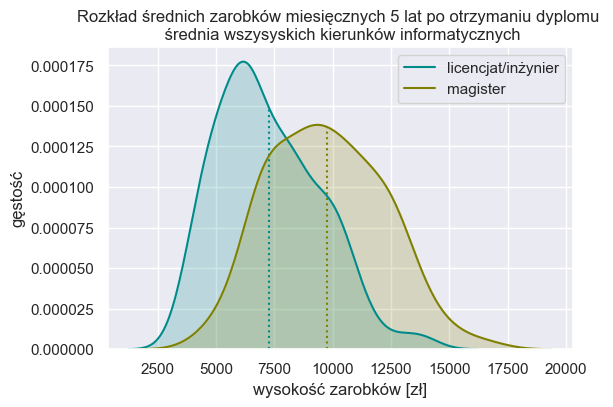

In [297]:
all_students_1 = df_inf[df_inf['P_POZIOM'] == '1'][income]
all_students_2 = df_inf[df_inf['P_POZIOM'] == '2'][income]
plot_density(all_students_1,all_students_2,"średnia wszysyskich kierunków informatycznych")

In [298]:
fields

['Informatyka',
 'Informatyka i ekonometria',
 'Informatyka stosowana',
 'Informatyka w biznesie - k. unikatowy',
 'Makrokierunek - automatyka i robot.,elektronika i telekom., informatyka',
 'Makrokierunek - elektronika, informatyka i telekomunikacja',
 'Teleinformatyka - k. unikatowy']

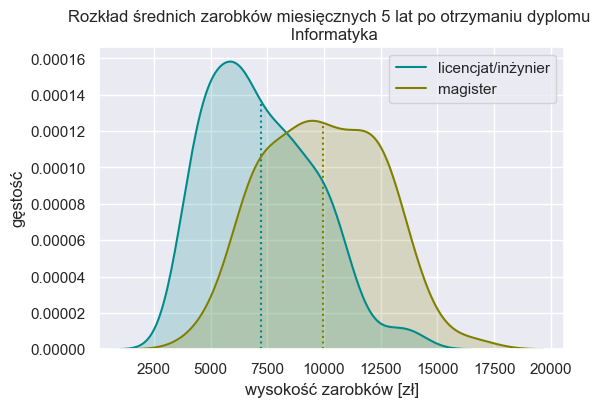

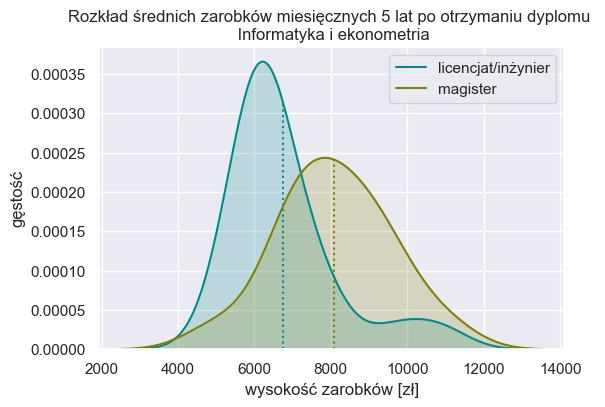

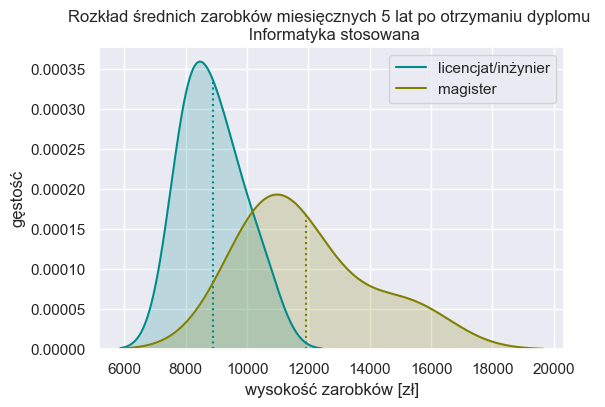

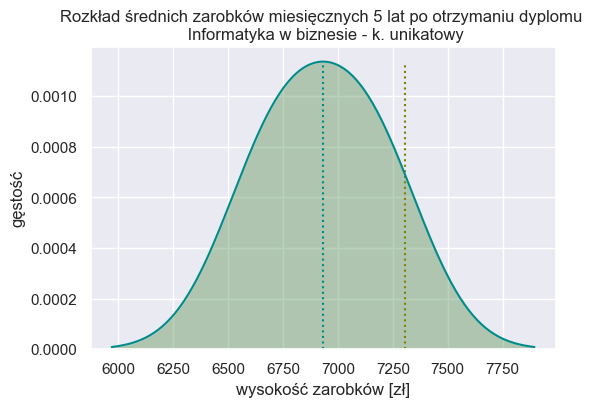

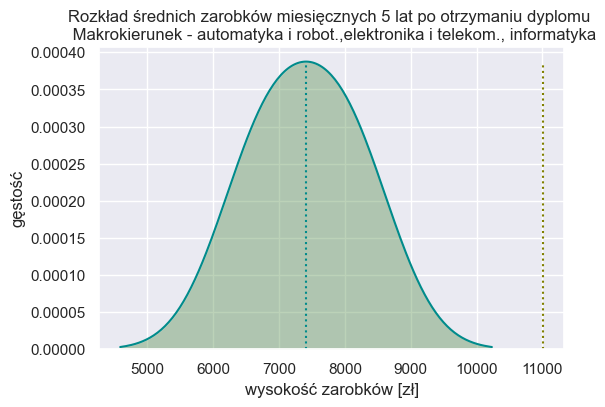

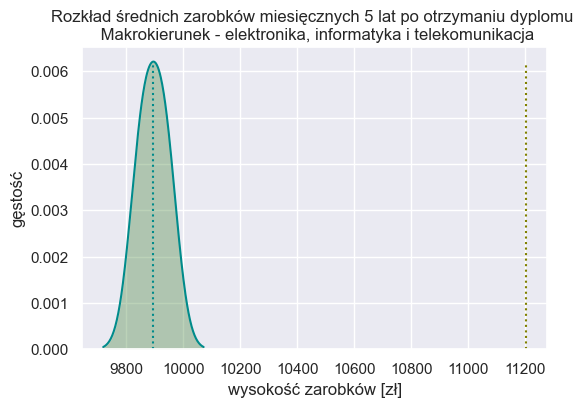

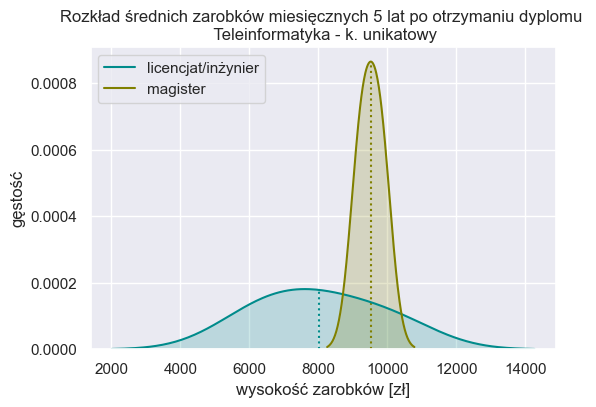

In [312]:
for i in range(7):
    x1 = df_inf[(df_inf.P_KIERUNEK_NAZWA == fields[i]) & (df_inf.P_POZIOM == '1')][income]
    x2 = df_inf[(df_inf.P_KIERUNEK_NAZWA == fields[i]) & (df_inf.P_POZIOM == '2')][income]
    plot_density(x1,x2, fields[i])